In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar dados
dados = pd.read_csv('student-mat.csv', sep=';')
dados.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Remover instâncias com valores faltantes
dados.dropna(inplace=True)

# Remover instâncias duplicadas
dados.drop_duplicates(inplace=True)

In [ ]:
#virualizar descrição quantitativa dos dados
pd.set_option('display.precision',2)
dados.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [ ]:
# Definir features e target
X = dados[['sex', 'age', 'studytime', 'failures', 'internet', 'absences']]
Y = (dados['G1'] + dados['G2'] + dados['G3']) / 3  # Média das notas
Y = Y.apply(lambda x: 1 if x >= 12 else 0)  # Convertendo para binário (1: aprovado, 0: reprovado)

In [ ]:
# Aplicar one-hot encoding para variáveis categóricas
X = pd.get_dummies(X, columns=['sex', 'internet'])

In [ ]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Normalizar dados
scaler = MinMaxScaler()
colunas_a_normalizar = ['studytime', 'age', 'absences']
scaler.fit(X_train[colunas_a_normalizar])
X_train[colunas_a_normalizar] = scaler.transform(X_train[colunas_a_normalizar])
X_test[colunas_a_normalizar] = scaler.transform(X_test[colunas_a_normalizar])

In [ ]:
# Treinar modelos
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Criar e treinar o classificador SVM com probability=True
svm = SVC(kernel='sigmoid', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [ ]:
# Fazer previsões
y_pred_logistico = modelo_logistico.predict(X_test)
y_pred_tree = modelo_tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Calcular métricas para o modelo logístico
accuracy_logistico = accuracy_score(y_test, y_pred_logistico)
precision_logistico = precision_score(y_test, y_pred_logistico)
recall_logistico = recall_score(y_test, y_pred_logistico)
f1_logistico = f1_score(y_test, y_pred_logistico)
conf_matrix_logistico = confusion_matrix(y_test, y_pred_logistico)
report_logistico = classification_report(y_test, y_pred_logistico)
roc_auc_logistico = roc_auc_score(y_test, modelo_logistico.predict_proba(X_test)[:, 1])

In [ ]:
# Calcular métricas para o modelo Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, modelo_tree.predict_proba(X_test)[:, 1])

In [ ]:
# Calcular probabilidades para a classe positiva e métricas para o modelo SVM
y_prob_svm = svm.predict_proba(X_test)[:, 1]
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

In [ ]:
# Plotar curvas ROC
def plot_roc_curve(modelo, X_test, y_test, nome_modelo):
    fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:, 1])
    roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - ' + nome_modelo)
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Plotar matriz de confusão
def plot_confusion_matrix(conf_matrix, nome_modelo):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
    plt.title('Matriz de Confusão - ' + nome_modelo)
    plt.show()

In [ ]:
# Imprimir métricas numéricas

print("Métricas do Modelo Logístico:")
print("Acurácia: {:.2f}".format(accuracy_logistico), "Precisão: {:.2f}".format(precision_logistico), "Recall: {:.2f}".format(recall_logistico), "F1: {:.2f}".format(f1_logistico), "AUC-ROC: {:.2f}".format(roc_auc_logistico))
print()
print("Relatório de Classificação:\n", report_logistico)
print()
print("\nMétricas do Modelo Decision Tree:")
print("Acurácia: {:.2f}".format(accuracy_tree), "Precisão: {:.2f}".format(precision_tree), "Recall: {:.2f}".format(recall_tree), "F1: {:.2f}".format(f1_tree), "AUC-ROC: {:.2f}".format(roc_auc_tree))
print()
print("Relatório de Classificação:\n", report_tree)
print()
print("\nMétricas do Modelo SVM:")
print("Acurácia: {:.2f}".format(accuracy_svm), "Precisão: {:.2f}".format(precision_svm))


Métricas do Modelo Logístico:
Acurácia: 0.67 Precisão: 0.65 Recall: 0.25 F1: 0.36 AUC-ROC: 0.74

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78        75
           1       0.65      0.25      0.36        44

    accuracy                           0.67       119
   macro avg       0.66      0.58      0.57       119
weighted avg       0.67      0.67      0.62       119



Métricas do Modelo Decision Tree:
Acurácia: 0.63 Precisão: 0.50 Recall: 0.55 F1: 0.52 AUC-ROC: 0.61

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        75
           1       0.50      0.55      0.52        44

    accuracy                           0.63       119
   macro avg       0.61      0.61      0.61       119
weighted avg       0.64      0.63      0.63       119



Métricas do Modelo SVM:
Acurácia: 0.55 Precisão: 0.34


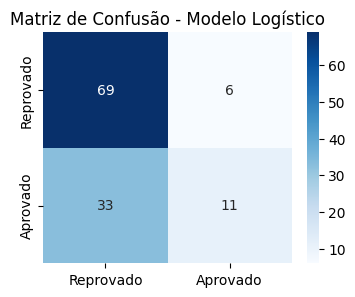

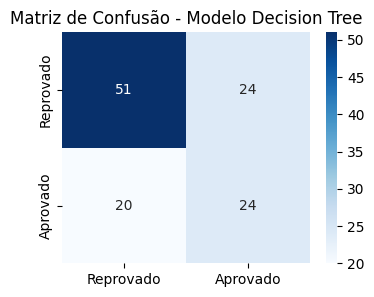

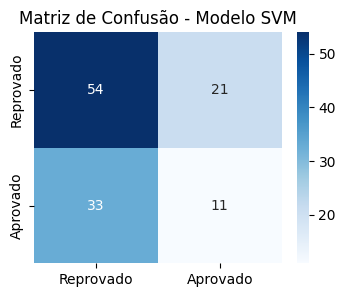

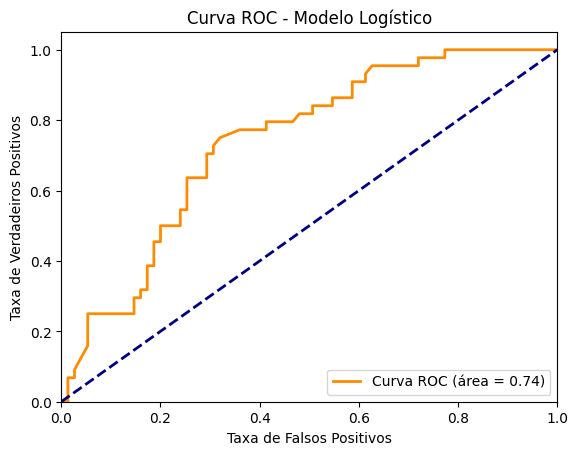

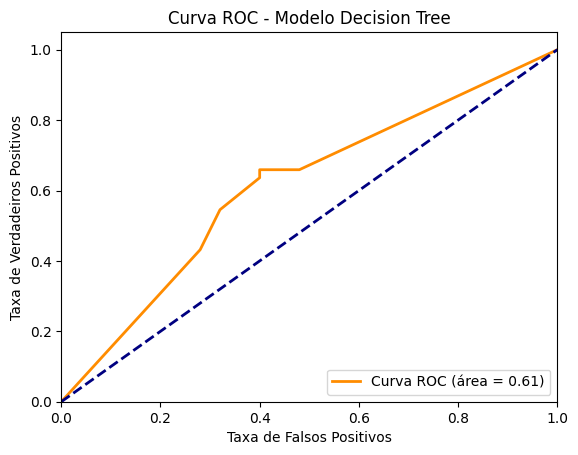

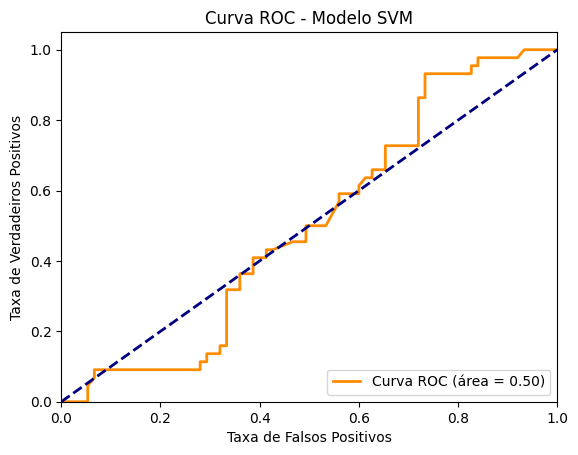

In [ ]:
#Imprimir Metricas Gráficos
plot_confusion_matrix(conf_matrix_logistico, 'Modelo Logístico')
print()
plot_confusion_matrix(conf_matrix_tree, 'Modelo Decision Tree')
print()
plot_confusion_matrix(conf_matrix_svm, 'Modelo SVM')
print()
plot_roc_curve(modelo_logistico, X_test, y_test, 'Modelo Logístico')
print()
plot_roc_curve(modelo_tree, X_test, y_test, 'Modelo Decision Tree')
print()
plot_roc_curve(svm, X_test, y_test, 'Modelo SVM')
print()

**Análise:**
*   O modelo logístico tem a maior acurácia (67%), mas seu recall é relativamente baixo (25%). Isso sugere que o modelo tem dificuldade em identificar corretamente os casos positivos.
*   O modelo de árvore de decisão tem uma acurácia ligeiramente inferior (65%), mas um recall melhor (55%). Isso indica que o modelo de árvore de decisão tem uma capacidade relativamente melhor de identificar corretamente os casos positivos, embora sua precisão seja um pouco menor.
*   O modelo SVM tem a menor acurácia (55%) e precisão (34%), indicando um desempenho geral inferior em comparação com os outros modelos.

**Resumindo: no meu modelo o melhor é a arvore de decisão**

In [ ]:

# Visualização da distribuição das classes com base na variável de destino 'Y'
contagem_classes = Y.value_counts()
print("Contagem de ocorrências de cada classe:")
print(contagem_classes)

# Visualização
#contagem_classes.plot(kind='bar', color=['skyblue', 'orange'])
#plt.title('Distribuição das classes')
#plt.xlabel('Classe')
#plt.ylabel('Contagem')
#plt.xticks(rotation=0)
#plt.show()

# Proporção das classes
proporcao_classes = Y.value_counts(normalize=True)
print("\nProporção de cada classe:")
print(proporcao_classes)


Contagem de ocorrências de cada classe:
0    243
1    152
dtype: int64

Proporção de cada classe:
0    0.62
1    0.38
dtype: float64
